# Data Analysis

In [2]:
#Imports all the libraries needed for the project
import ast
import re
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
from numpy import mean
import time
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import re
from scipy.stats import pearsonr
import math
from statistics import median
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, accuracy_score
import json
import wordcloud
import copy
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
#Reads in the data
train = pd.read_csv('data/final_train.csv')
test = pd.read_csv('data/test.csv')

## Statistics of the data

### 1. Overall

In [4]:
print("Shape of train : \n" + str(train.shape) + "\n")
print("Shape of test : \n" + str(test.shape) + "\n")
print("Number of NA Train for the variable budget : \n" + str(train[train.budget == 0].shape[0]) + "\n")
print("Number of NA Test for the variable budget : \n" + str(test[test.budget == 0].shape[0]))

Shape of train : 
(7292, 30)

Shape of test : 
(4398, 22)

Number of NA Train for the variable budget : 
1657

Number of NA Test for the variable budget : 
1211


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7292 non-null   int64  
 1   belongs_to_collection  4898 non-null   object 
 2   budget                 7292 non-null   int64  
 3   genres                 7285 non-null   object 
 4   homepage               2974 non-null   object 
 5   imdb_id                7292 non-null   object 
 6   original_language      7292 non-null   object 
 7   original_title         7292 non-null   object 
 8   overview               7286 non-null   object 
 9   popularity             7292 non-null   float64
 10  poster_path            7292 non-null   object 
 11  production_companies   7137 non-null   object 
 12  production_countries   7238 non-null   object 
 13  release_date           7292 non-null   object 
 14  runtime                7292 non-null   float64
 15  spok

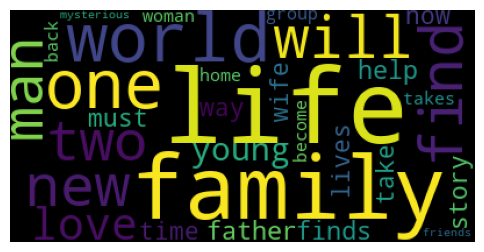

In [6]:
#wordcloud for overview
train['overview'] = train['overview'].fillna('')
wc_overview=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=None,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_overview.generate(' '.join(train['overview']))
plt.figure(figsize=(6,6))
plt.imshow(wc_overview)
plt.axis('off')
plt.show()

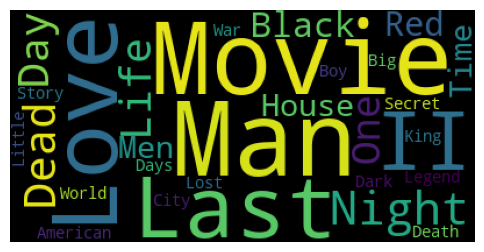

In [7]:
#wordcloud for title
train['title'] = train['title'].fillna('')
wc_title=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=None,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_title.generate(' '.join(train['title']))
plt.figure(figsize=(6,6))
plt.imshow(wc_title)
plt.axis('off')
plt.show()

(-0.5, 399.5, 199.5, -0.5)

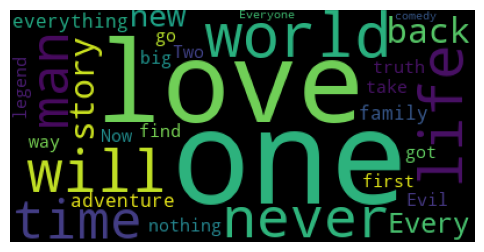

In [8]:
#wordcloud for tagline
train['tagline'] = train['tagline'].fillna('')
wc_tagline=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=None,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_tagline.generate(' '.join(train['tagline']))
plt.figure(figsize=(6,6))
plt.imshow(wc_tagline)
plt.axis('off')

### 2. Revenue

In [9]:
# function to plot the distribution of a feature
def plot_dist(field, color):
    f, ax = plt.subplots(3, figsize=(10,6))

    sns.set(rc={'figure.figsize':(12,8)})
    sns.boxplot(x=train[field], ax = ax[0], color=color)
    ax[0].set_title(f"Box Plot of {field} variable")
    sns.distplot(a=train[field], kde = False, ax = ax[1], color=color, hist_kws=dict(alpha=1))
    ax[1].set_title(f"Histogram of {field} variable")
    sns.distplot(a=np.log1p(train[field]), kde = False, ax = ax[2], color=color, hist_kws=dict(alpha=1))
    ax[2].set_title(f"Log1p transformed {field} Histogram")
    f.tight_layout()

C:\Users\zjy\AppData\Local\Temp\ipykernel_26888\485708692.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train[field], kde = False, ax = ax[1], color=color, hist_kws=dict(alpha=1))
C:\Users\zjy\AppData\Local\Temp\ipykernel_26888\485708692.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

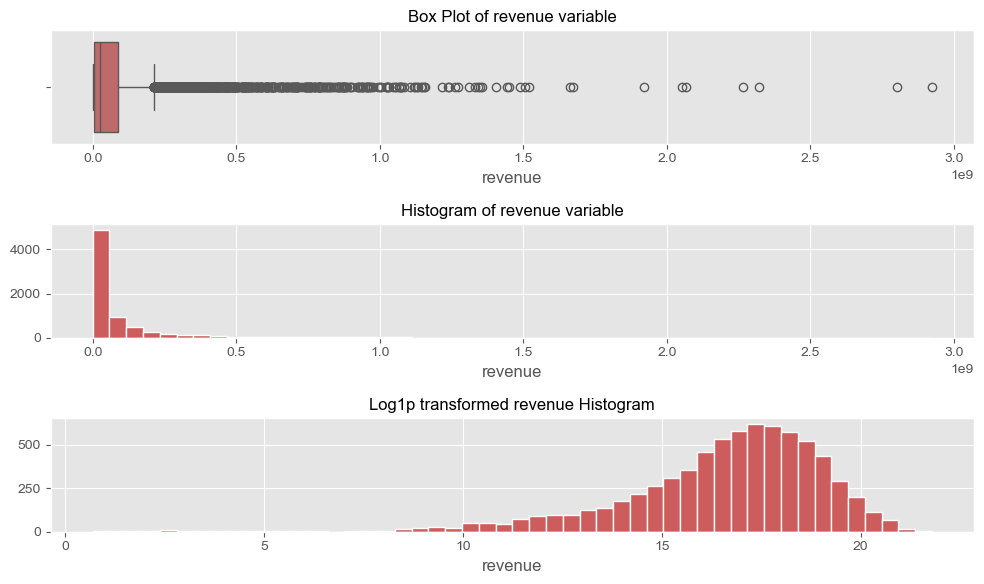

In [10]:
plot_dist('revenue', 'indianred')

In [11]:
train.revenue.nsmallest(20)

347      1
1753     1
1873     1
1916     1
5831     1
695      2
334      3
1540     3
2381     3
2116     4
1345     5
2488     6
1190     7
639      8
2250     8
2580     8
280     10
665     10
3293    10
1141    11
Name: revenue, dtype: int64

### 3. belongs_to_collection 0

### 4. Budget

C:\Users\zjy\AppData\Local\Temp\ipykernel_26888\485708692.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train[field], kde = False, ax = ax[1], color=color, hist_kws=dict(alpha=1))
C:\Users\zjy\AppData\Local\Temp\ipykernel_26888\485708692.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

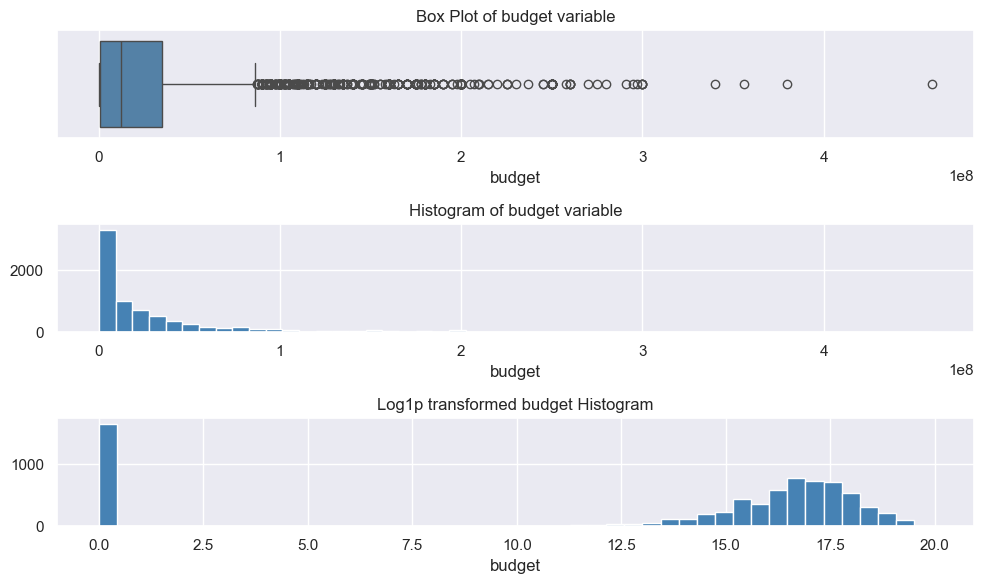

In [12]:
# plot the distribution of budget
plot_dist('budget', 'steelblue')

In [13]:
print('Movies with budget listed as 0: ',(train.budget == 0).sum())

Movies with budget listed as 0:  1657


### 5. genres (reform?)

In [14]:
# count the word frequency in the genres column
genres = train.genres.apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
genres = genres.apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
genres = genres.apply(lambda x: ' '.join(x))
freq_genres = genres.value_counts()
print(freq_genres.head(20))


genres
Drama                               477
Comedy                              332
Drama Romance                       217
Comedy Romance                      181
Comedy Drama                        148
Horror Thriller                     142
Comedy Drama Romance                117
Horror                               93
Action Thriller                      85
Drama Thriller                       85
Drama History                        79
Action Crime Thriller                68
Crime Drama Thriller                 64
Drama Comedy                         61
Romance Drama                        56
Crime Drama                          56
Action Comedy                        51
Action Adventure Science Fiction     50
Horror Mystery Thriller              50
Comedy Crime                         50
Name: count, dtype: int64


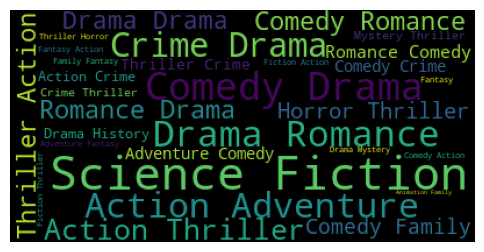

In [16]:
#wordcloud for genres
wc_genres=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=None,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_genres.generate(' '.join(genres))
plt.figure(figsize=(6,6))
plt.imshow(wc_genres)
plt.axis('off')
plt.show()

### 6. homepage 0

### 7. imdb_id

### 8. original_language

Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

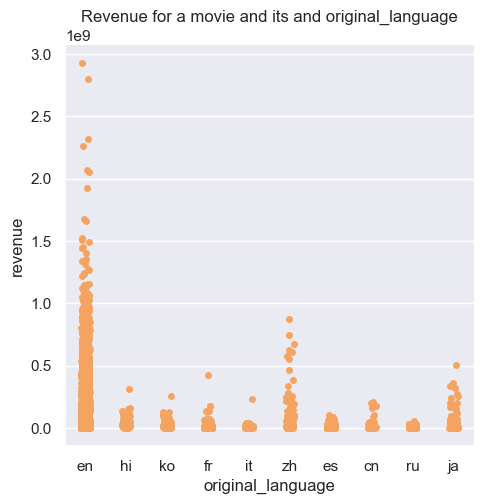

In [17]:
sns.catplot(x='original_language', y='revenue', color='sandybrown', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)])
plt.title('Revenue for a movie and its and original_language')

,number_of_movies
en,6158
ja,232
fr,179
es,103
ko,96
zh,80
ru,79
hi,67
cn,55
it,55


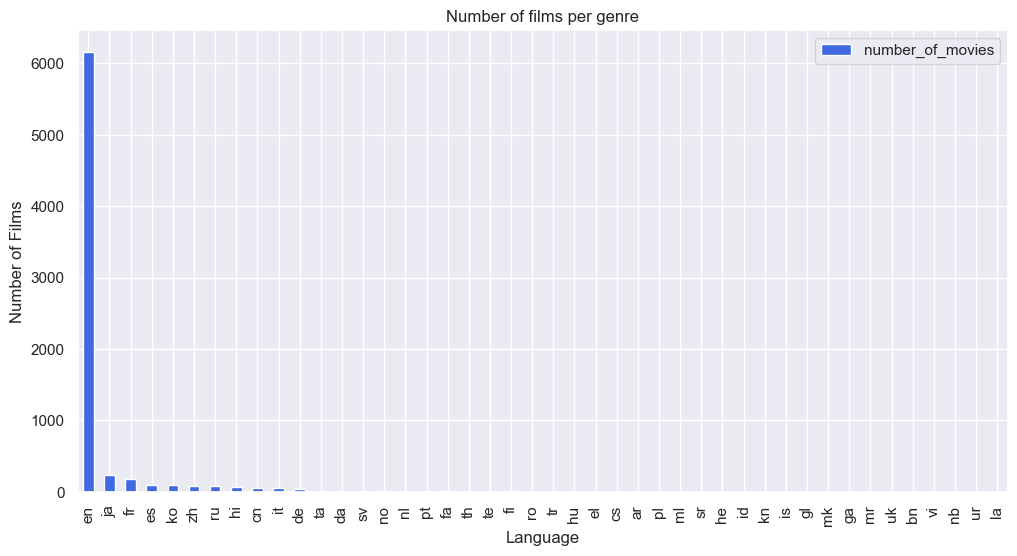

In [18]:
lanDict = dict()

for lan in train["original_language"]:
    if lan not in lanDict:
        lanDict[lan] = 1
    else:
        lanDict[lan] += 1
        
sns.set(rc={'figure.figsize':(12,6)})
lan_df = pd.DataFrame.from_dict(lanDict, orient='index')
lan_df.columns = ["number_of_movies"]
lan_df = lan_df.sort_values(by="number_of_movies", ascending=False)
lan_df.plot.bar(color='royalblue')
plt.title("Number of films per genre")
plt.ylabel("Number of Films")
plt.xlabel("Language")
lan_df.head(10)

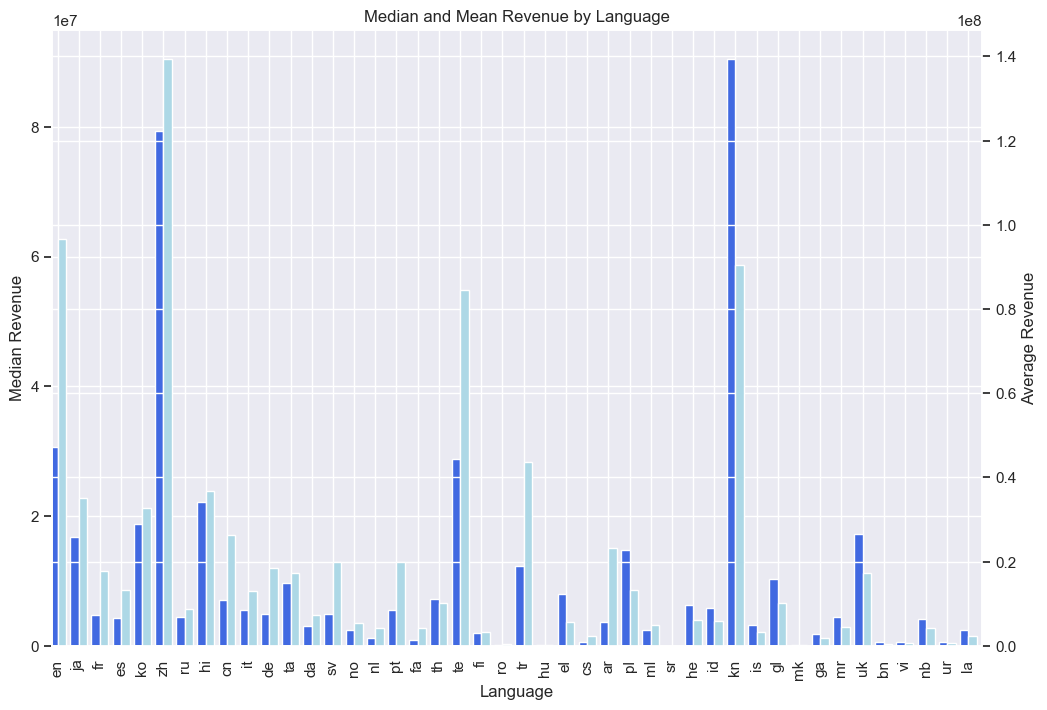

In [19]:
# bivariate analysis of revenue with genre
# creating a callable index for genres
for g in lan_df.index.values:
    train[g] = train['original_language'].apply(lambda x: 1 if g in x else 0)

# median revenue per genre type
for i, g in enumerate(lan_df.index.values):
    lan_df.loc[g, "median_rev"] = train[train[g]==1].revenue.median()
    
lan_df.sort_values(by=["number_of_movies", "median_rev"], ascending=False).head(10)

# mean revenue for genre type
for i, g in enumerate(lan_df.index.values):
    lan_df.loc[g, "mean_rev"] = train[train[g]==1].revenue.mean()

lan_df.sort_values(by=["number_of_movies", "mean_rev"], ascending=False).head(10)

# plot the mean and median revenue for each genre
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.4

lan_df.median_rev.plot(kind='bar', color='royalblue', ax=ax, width=width, position=1)
lan_df.mean_rev.plot(kind='bar', color='lightblue', ax=ax2, width=width, position=0)
ax.set_ylabel('Median Revenue')
ax2.set_ylabel('Average Revenue')
ax.set_xlabel('Language')
plt.title('Median and Mean Revenue by Language')
plt.show()

### 9.original_title

### 10. overview

### 11. popularity

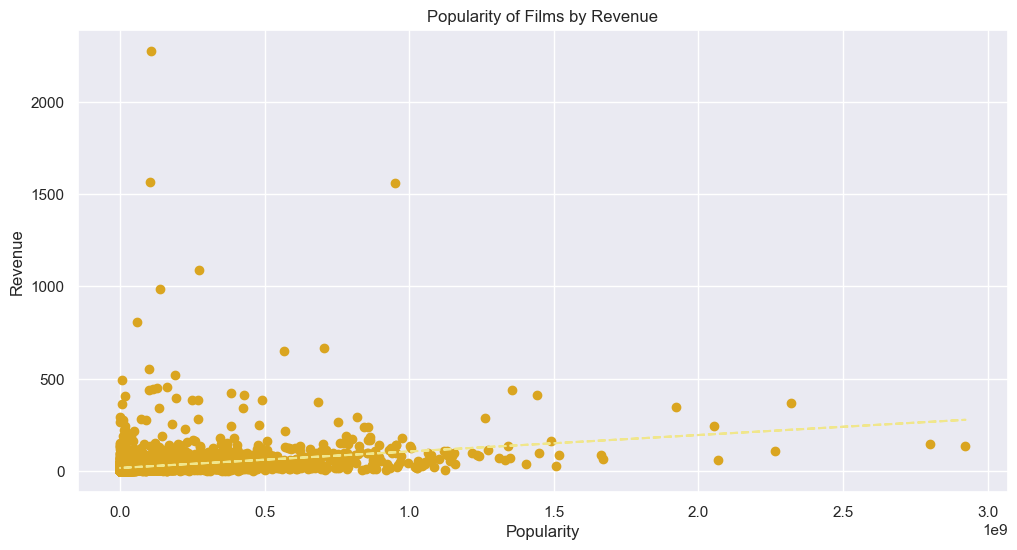

In [20]:
# bivariate: plotting popularity and revenue
sns.set(rc={'figure.figsize':(12, 6)})
cx = train['revenue']
pop = train['popularity']
plt.plot(cx, pop, 'o', color='goldenrod')
plt.ylabel("Revenue")
plt.xlabel("Popularity")
plt.title("Popularity of Films by Revenue")

z = np.polyfit(cx, pop, 1)
p = np.poly1d(z)
plt.plot(cx, p(cx), "--", color='khaki');

### 12. poster_path

### 13. production_companies

### 14. production_countries

### 15. release_data

In [21]:
# release date data manipulation
# naming a date-specific dataframe for housekeeping
train_date = train['release_date']

# converting to datetime format, with .dt used for accessing quantities
train_date = pd.to_datetime(train_date)
train_date.dt
print(train_date)

0      2015-02-20
1      2004-08-06
2      2014-10-10
3      2012-03-09
4      2009-02-05
          ...    
7287   1988-12-02
7288   2016-12-14
7289   2014-12-24
7290   2017-03-22
7291   2022-07-13
Name: release_date, Length: 7292, dtype: datetime64[ns]


C:\Users\zjy\AppData\Local\Temp\ipykernel_26888\964852981.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_date = pd.to_datetime(train_date)


C:\Users\zjy\AppData\Local\Temp\ipykernel_26888\1808658474.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  dx.set_xticklabels(dx.get_xticklabels(), rotation=90)


[Text(0, 0, '1920'),
 Text(1, 0, '1925'),
 Text(2, 0, '1926'),
 Text(3, 0, '1927'),
 Text(4, 0, '1930'),
 Text(5, 0, '1931'),
 Text(6, 0, '1933'),
 Text(7, 0, '1934'),
 Text(8, 0, '1935'),
 Text(9, 0, '1936'),
 Text(10, 0, '1937'),
 Text(11, 0, '1938'),
 Text(12, 0, '1939'),
 Text(13, 0, '1940'),
 Text(14, 0, '1941'),
 Text(15, 0, '1942'),
 Text(16, 0, '1943'),
 Text(17, 0, '1944'),
 Text(18, 0, '1946'),
 Text(19, 0, '1947'),
 Text(20, 0, '1948'),
 Text(21, 0, '1949'),
 Text(22, 0, '1950'),
 Text(23, 0, '1951'),
 Text(24, 0, '1952'),
 Text(25, 0, '1953'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1959'),
 Text(32, 0, '1960'),
 Text(33, 0, '1961'),
 Text(34, 0, '1962'),
 Text(35, 0, '1963'),
 Text(36, 0, '1964'),
 Text(37, 0, '1965'),
 Text(38, 0, '1966'),
 Text(39, 0, '1967'),
 Text(40, 0, '1968'),
 Text(41, 0, '1969'),
 Text(42, 0, '1970'),
 Text(43, 0, '1971'),
 Text(44, 0, '1972'),
 Text(45, 0, '1973')

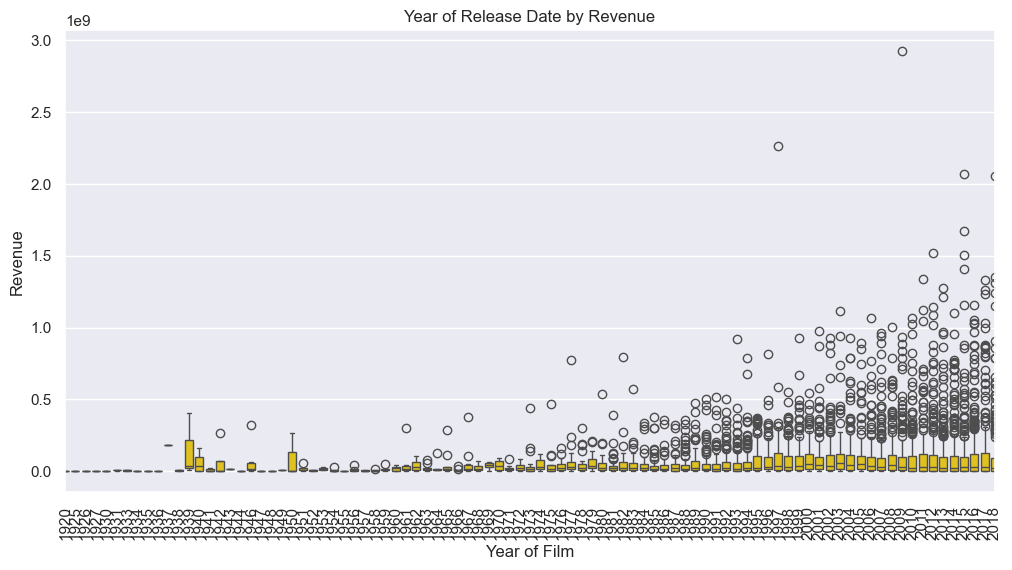

In [22]:
# bivariate year of release with revenue data
fig, dx = plt.subplots()
sns.boxplot(x=train_date.dt.year, y=train['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

dx.set(xlim=(0, 90))
dx.set_xlabel("Year of Film")
dx.set_ylabel("Revenue")
dx.set_title("Year of Release Date by Revenue")

dx.set_xticklabels(dx.get_xticklabels(), rotation=90)

### 16. runtime

### 17. spoken_language

### 18. status

### 19. tagline

### 20. cast

### 21. crew

## True Value

In [ ]:
train_true=train.__deepcopy__()
test_true=test.__deepcopy__()

In [ ]:
train_true.loc[train_true['id'] == 16,'revenue'] = 192864         
train_true.loc[train_true['id'] == 90,'budget'] = 30000000                  
train_true.loc[train_true['id'] == 118,'budget'] = 60000000       
train_true.loc[train_true['id'] == 149,'budget'] = 18000000       
train_true.loc[train_true['id'] == 313,'revenue'] = 12000000       
train_true.loc[train_true['id'] == 451,'revenue'] = 12000000      
train_true.loc[train_true['id'] == 464,'budget'] = 20000000       
train_true.loc[train_true['id'] == 470,'budget'] = 13000000       
train_true.loc[train_true['id'] == 513,'budget'] = 930000         
train_true.loc[train_true['id'] == 797,'budget'] = 8000000        
train_true.loc[train_true['id'] == 819,'budget'] = 90000000       
train_true.loc[train_true['id'] == 850,'budget'] = 90000000       
train_true.loc[train_true['id'] == 1007,'budget'] = 2              
train_true.loc[train_true['id'] == 1112,'budget'] = 7500000       
train_true.loc[train_true['id'] == 1131,'budget'] = 4300000        
train_true.loc[train_true['id'] == 1359,'budget'] = 10000000       
train_true.loc[train_true['id'] == 1542,'budget'] = 1             
train_true.loc[train_true['id'] == 1570,'budget'] = 15800000       
train_true.loc[train_true['id'] == 1571,'budget'] = 4000000        
train_true.loc[train_true['id'] == 1714,'budget'] = 46000000       
train_true.loc[train_true['id'] == 1721,'budget'] = 17500000       
train_true.loc[train_true['id'] == 1865,'revenue'] = 25000000      
train_true.loc[train_true['id'] == 1885,'budget'] = 12             
train_true.loc[train_true['id'] == 2091,'budget'] = 10             
train_true.loc[train_true['id'] == 2268,'budget'] = 17500000       
train_true.loc[train_true['id'] == 2491,'budget'] = 6              
train_true.loc[train_true['id'] == 2602,'budget'] = 31000000       
train_true.loc[train_true['id'] == 2612,'budget'] = 15000000       
train_true.loc[train_true['id'] == 2696,'budget'] = 10000000      
train_true.loc[train_true['id'] == 2801,'budget'] = 10000000       
train_true.loc[train_true['id'] == 335,'budget'] = 2 
train_true.loc[train_true['id'] == 348,'budget'] = 12
train_true.loc[train_true['id'] == 470,'budget'] = 13000000 
train_true.loc[train_true['id'] == 513,'budget'] = 1100000
train_true.loc[train_true['id'] == 640,'budget'] = 6 
train_true.loc[train_true['id'] == 696,'budget'] = 1
train_true.loc[train_true['id'] == 797,'budget'] = 8000000 
train_true.loc[train_true['id'] == 850,'budget'] = 1500000
train_true.loc[train_true['id'] == 1199,'budget'] = 5 
train_true.loc[train_true['id'] == 1282,'budget'] = 9              
train_true.loc[train_true['id'] == 1347,'budget'] = 1
train_true.loc[train_true['id'] == 1755,'budget'] = 2
train_true.loc[train_true['id'] == 1801,'budget'] = 5
train_true.loc[train_true['id'] == 1918,'budget'] = 592 
train_true.loc[train_true['id'] == 2033,'budget'] = 4
train_true.loc[train_true['id'] == 2118,'budget'] = 344 
train_true.loc[train_true['id'] == 2252,'budget'] = 130
train_true.loc[train_true['id'] == 2256,'budget'] = 1 
train_true.loc[train_true['id'] == 2696,'budget'] = 10000000

In [ ]:
test_true.loc[test_true['id'] == 3033,'budget'] = 250 
test_true.loc[test_true['id'] == 3051,'budget'] = 50
test_true.loc[test_true['id'] == 3084,'budget'] = 337
test_true.loc[test_true['id'] == 3224,'budget'] = 4  
test_true.loc[test_true['id'] == 3594,'budget'] = 25  
test_true.loc[test_true['id'] == 3619,'budget'] = 500  
test_true.loc[test_true['id'] == 3831,'budget'] = 3  
test_true.loc[test_true['id'] == 3935,'budget'] = 500  
test_true.loc[test_true['id'] == 4049,'budget'] = 995946 
test_true.loc[test_true['id'] == 4424,'budget'] = 3  
test_true.loc[test_true['id'] == 4460,'budget'] = 8  
test_true.loc[test_true['id'] == 4555,'budget'] = 1200000 
test_true.loc[test_true['id'] == 4624,'budget'] = 30 
test_true.loc[test_true['id'] == 4645,'budget'] = 500 
test_true.loc[test_true['id'] == 4709,'budget'] = 450 
test_true.loc[test_true['id'] == 4839,'budget'] = 7
test_true.loc[test_true['id'] == 3125,'budget'] = 25 
test_true.loc[test_true['id'] == 3142,'budget'] = 1
test_true.loc[test_true['id'] == 3201,'budget'] = 450
test_true.loc[test_true['id'] == 3222,'budget'] = 6
test_true.loc[test_true['id'] == 3545,'budget'] = 38
test_true.loc[test_true['id'] == 3670,'budget'] = 18
test_true.loc[test_true['id'] == 3792,'budget'] = 19
test_true.loc[test_true['id'] == 3881,'budget'] = 7
test_true.loc[test_true['id'] == 3969,'budget'] = 400
test_true.loc[test_true['id'] == 4196,'budget'] = 6
test_true.loc[test_true['id'] == 4221,'budget'] = 11
test_true.loc[test_true['id'] == 4222,'budget'] = 500
test_true.loc[test_true['id'] == 4285,'budget'] = 11
test_true.loc[test_true['id'] == 4319,'budget'] = 1
test_true.loc[test_true['id'] == 4639,'budget'] = 10
test_true.loc[test_true['id'] == 4719,'budget'] = 45
test_true.loc[test_true['id'] == 4822,'budget'] = 22
test_true.loc[test_true['id'] == 4829,'budget'] = 20
test_true.loc[test_true['id'] == 4969,'budget'] = 20
test_true.loc[test_true['id'] == 5021,'budget'] = 40 
test_true.loc[test_true['id'] == 5035,'budget'] = 1 
test_true.loc[test_true['id'] == 5063,'budget'] = 14 
test_true.loc[test_true['id'] == 5119,'budget'] = 2 
test_true.loc[test_true['id'] == 5214,'budget'] = 30 
test_true.loc[test_true['id'] == 5221,'budget'] = 50 
test_true.loc[test_true['id'] == 4903,'budget'] = 15
test_true.loc[test_true['id'] == 4983,'budget'] = 3
test_true.loc[test_true['id'] == 5102,'budget'] = 28
test_true.loc[test_true['id'] == 5217,'budget'] = 75
test_true.loc[test_true['id'] == 5224,'budget'] = 3 
test_true.loc[test_true['id'] == 5469,'budget'] = 20 
test_true.loc[test_true['id'] == 5840,'budget'] = 1 
test_true.loc[test_true['id'] == 5960,'budget'] = 30
test_true.loc[test_true['id'] == 6506,'budget'] = 11 
test_true.loc[test_true['id'] == 6553,'budget'] = 280
test_true.loc[test_true['id'] == 6561,'budget'] = 7
test_true.loc[test_true['id'] == 6582,'budget'] = 218
test_true.loc[test_true['id'] == 6638,'budget'] = 5
test_true.loc[test_true['id'] == 6749,'budget'] = 8 
test_true.loc[test_true['id'] == 6759,'budget'] = 50 
test_true.loc[test_true['id'] == 6856,'budget'] = 10
test_true.loc[test_true['id'] == 6858,'budget'] =  100
test_true.loc[test_true['id'] == 6876,'budget'] =  250
test_true.loc[test_true['id'] == 6972,'budget'] = 1
test_true.loc[test_true['id'] == 7079,'budget'] = 8000000
test_true.loc[test_true['id'] == 7150,'budget'] = 118
test_true.loc[test_true['id'] == 6506,'budget'] = 118
test_true.loc[test_true['id'] == 7225,'budget'] = 6
test_true.loc[test_true['id'] == 7231,'budget'] = 85
test_true.loc[test_true['id'] == 5222,'budget'] = 5
test_true.loc[test_true['id'] == 5322,'budget'] = 90
test_true.loc[test_true['id'] == 5350,'budget'] = 70
test_true.loc[test_true['id'] == 5378,'budget'] = 10
test_true.loc[test_true['id'] == 5545,'budget'] = 80
test_true.loc[test_true['id'] == 5810,'budget'] = 8
test_true.loc[test_true['id'] == 5926,'budget'] = 300
test_true.loc[test_true['id'] == 5927,'budget'] = 4
test_true.loc[test_true['id'] == 5986,'budget'] = 1
test_true.loc[test_true['id'] == 6053,'budget'] = 20
test_true.loc[test_true['id'] == 6104,'budget'] = 1
test_true.loc[test_true['id'] == 6130,'budget'] = 30
test_true.loc[test_true['id'] == 6301,'budget'] = 150
test_true.loc[test_true['id'] == 6276,'budget'] = 100
test_true.loc[test_true['id'] == 6473,'budget'] = 100
test_true.loc[test_true['id'] == 6842,'budget'] = 30

In [ ]:
cols_to_drop = ['adult', 'backdrop_path', 'video', 'vote_count', 'vote_average']
train.drop(cols_to_drop, axis=1, inplace=True)
train_true.drop(cols_to_drop, axis=1, inplace=True)

Text(0.5, 1.0, 'Missing Value count By Features')

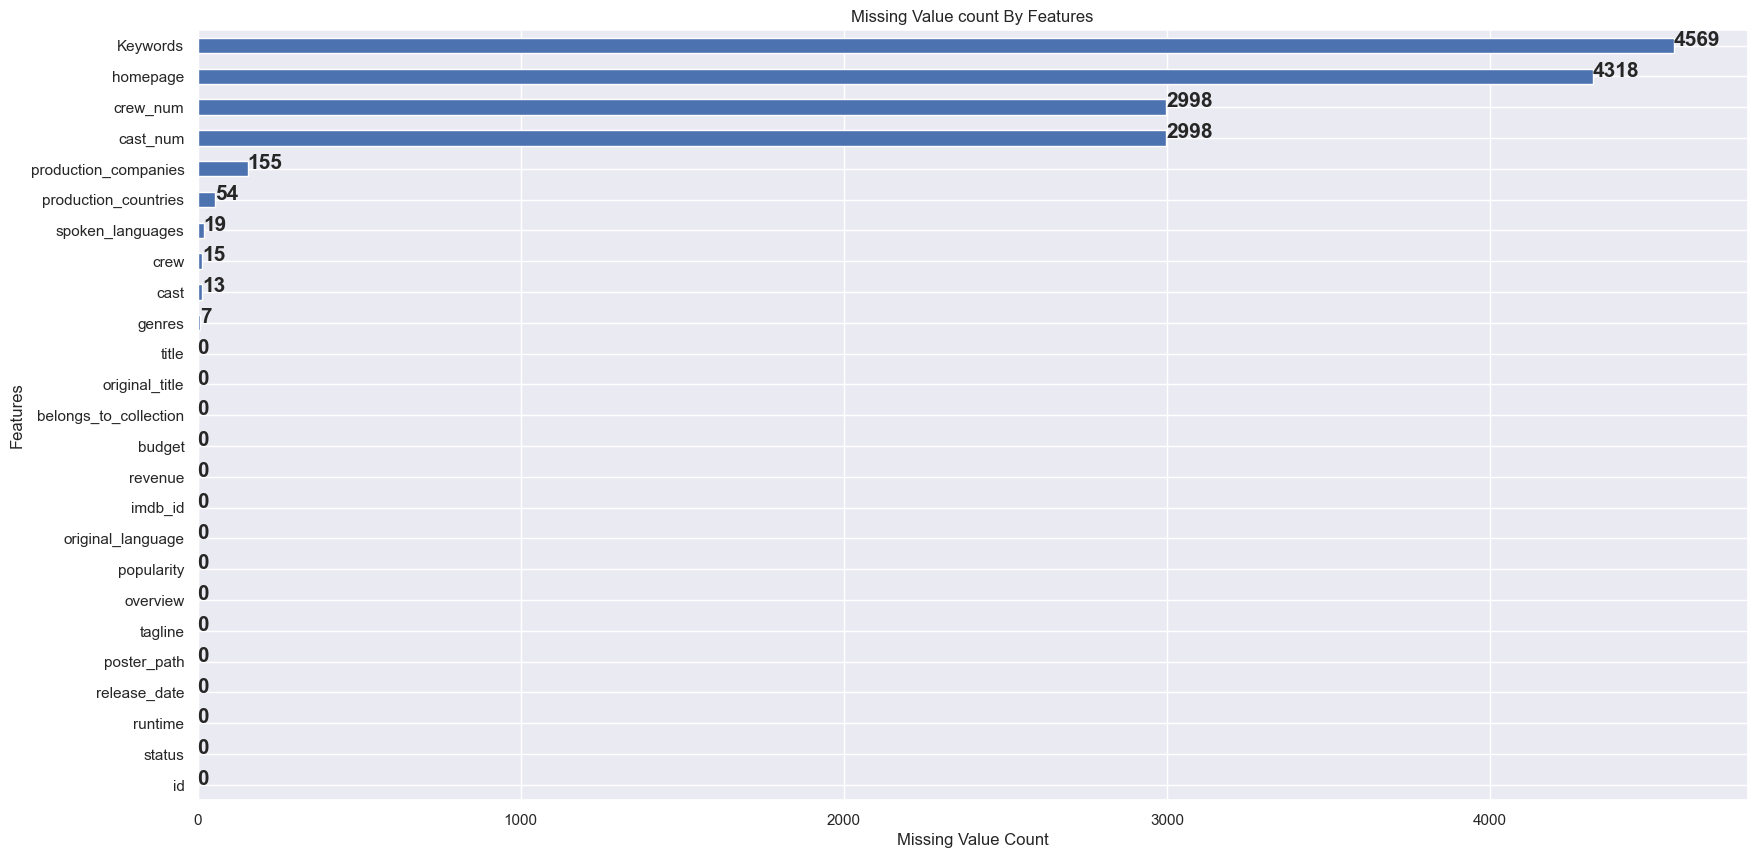

In [ ]:
train_true.isna().sum().sort_values(ascending=True).plot(kind="barh", figsize=(20,10))
for i, v in enumerate(train_true.isna().sum().sort_values(ascending=True)):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

<Axes: xlabel='budget', ylabel='revenue'>

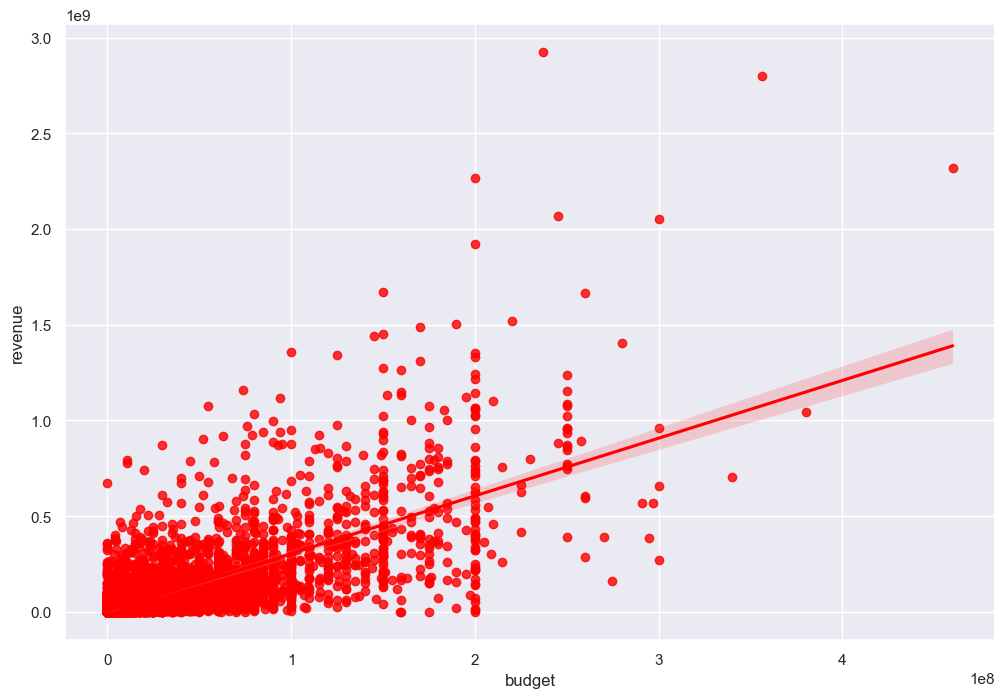

In [135]:
sns.regplot(x="budget", y="revenue", data = train_true, color = 'red')

<Axes: xlabel='popularity', ylabel='revenue'>

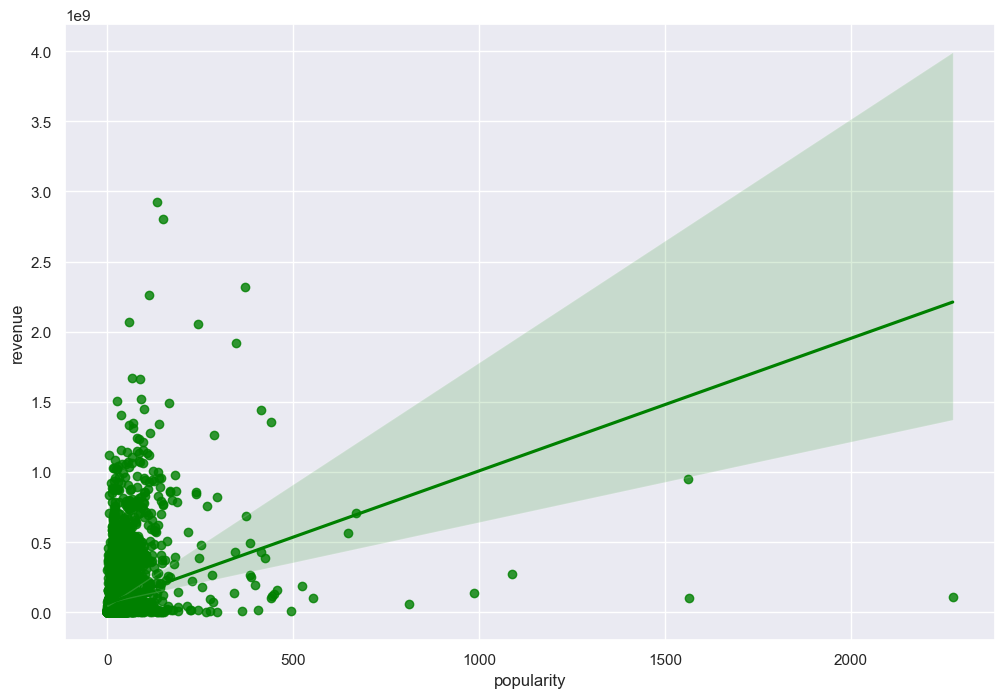

In [136]:
sns.regplot(x="popularity", y="revenue", data = train_true, color = 'green')

<Axes: xlabel='runtime', ylabel='revenue'>

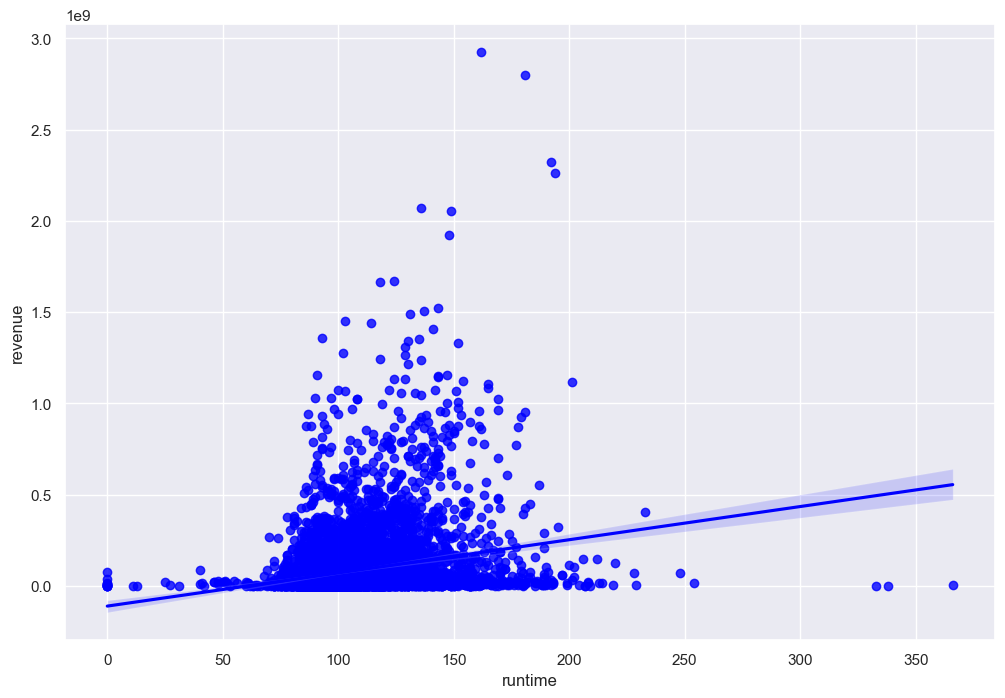

In [137]:
sns.regplot(x="runtime", y="revenue", data = train_true, color = 'blue')

<Axes: xlabel='cast_num', ylabel='revenue'>

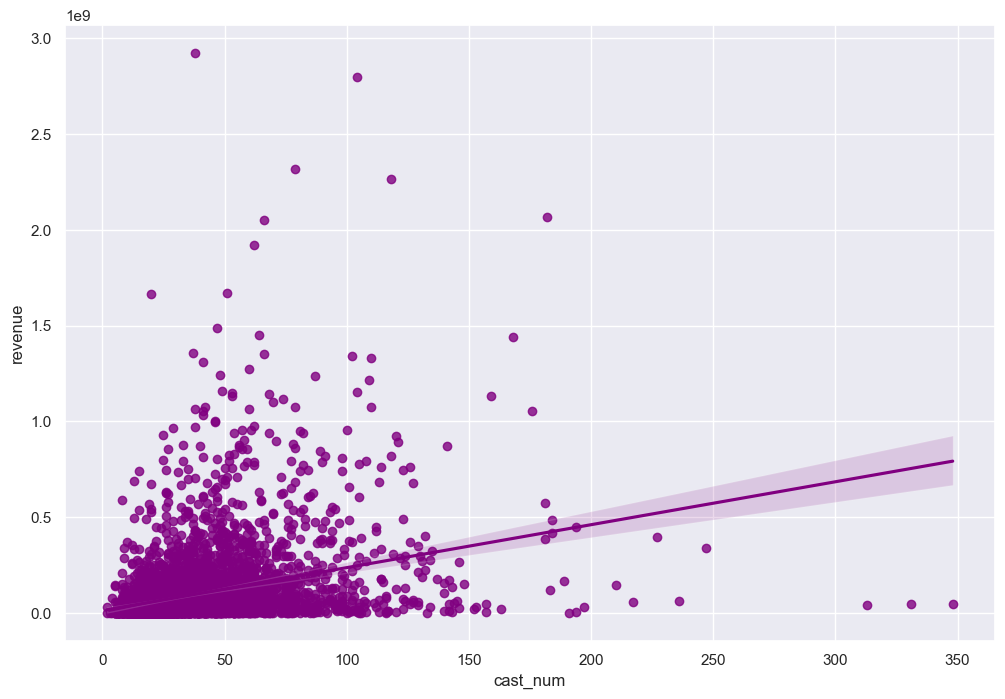

In [138]:
sns.regplot(x="cast_num", y="revenue", data = train_true, color = 'purple')

<Axes: xlabel='crew_num', ylabel='revenue'>

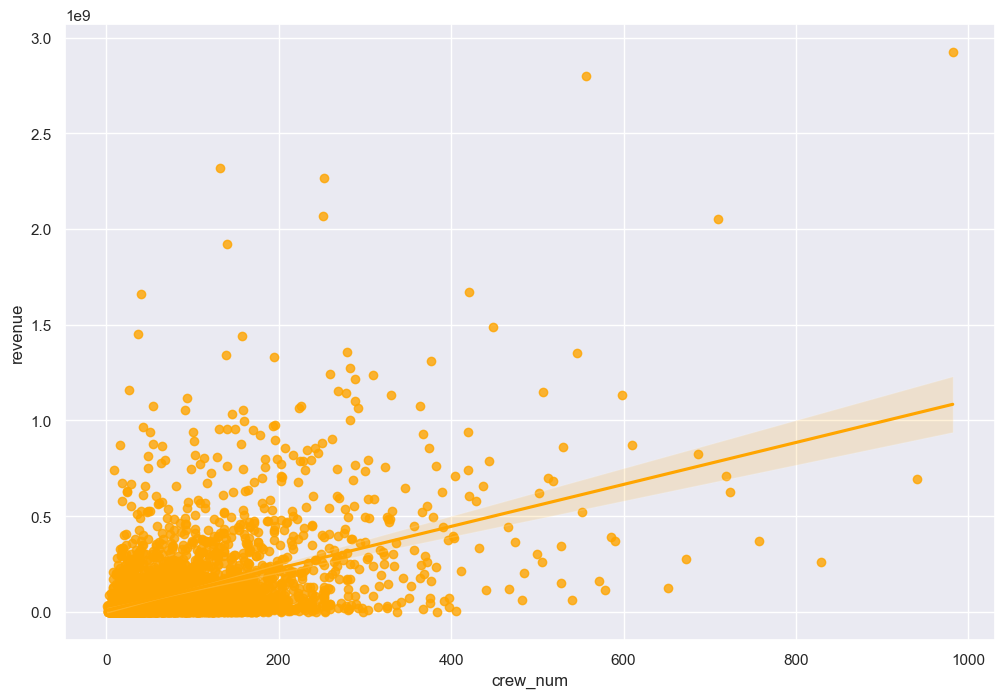

In [139]:
sns.regplot(x="crew_num", y="revenue", data = train_true, color = 'orange')

In [18]:
#Add log revenue & log budget to data
train_true['log_revenue'] = np.log1p(train['revenue'])
train_true['log_budget'] = np.log1p(train['budget'])
train_true.describe(include="all")

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,revenue,adult,backdrop_path,video,vote_average,vote_count,cast_num,crew_num,log_revenue,log_budget
count,7.292000e+03,4898,7.292000e+03,7285,2974,7292,7292,7292,7286,7292.000000,...,7.292000e+03,4294,4294,4294,4294.000000,4294.000000,4294.000000,4294.000000,7292.000000,7292.000000
unique,NaN,1225,NaN,2204,2942,7292,44,7112,7284,NaN,...,NaN,1,4294,1,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,[null],NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.naruto-movie.com/,tt2637294,en,The Little Mermaid,Wilbur the pig is scared of the end of the sea...,NaN,...,NaN,False,/kjQBrc00fB2RjHZB3PGR4w9ibpz.jpg,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3007,NaN,265,5,1,6158,3,2,NaN,...,NaN,4294,1,4294,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.238458e+05,NaN,2.778431e+07,NaN,NaN,NaN,NaN,NaN,NaN,25.162723,...,8.641720e+07,NaN,NaN,NaN,6.657966,2351.628086,39.081276,84.129716,16.520224,12.789248
std,2.282798e+05,NaN,4.263890e+07,NaN,NaN,NaN,NaN,NaN,NaN,54.261198,...,1.766128e+08,NaN,NaN,NaN,0.797887,3472.958456,26.993717,86.463508,2.656393,7.103505
min,1.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,1.000000e+00,NaN,NaN,NaN,0.000000,0.000000,2.000000,1.000000,0.693147,0.000000
25%,1.456750e+03,NaN,5.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,8.655787,...,4.716003e+06,NaN,NaN,NaN,6.137000,440.000000,21.000000,28.000000,15.365433,13.122365
50%,4.545000e+03,NaN,1.200000e+07,NaN,NaN,NaN,NaN,NaN,NaN,17.172000,...,2.472639e+07,NaN,NaN,NaN,6.697000,1064.000000,32.000000,56.000000,17.024141,16.300417
75%,9.205350e+04,NaN,3.500000e+07,NaN,NaN,NaN,NaN,NaN,NaN,26.568000,...,8.776158e+07,NaN,NaN,NaN,7.223000,2724.250000,49.000000,113.000000,18.290551,17.370859


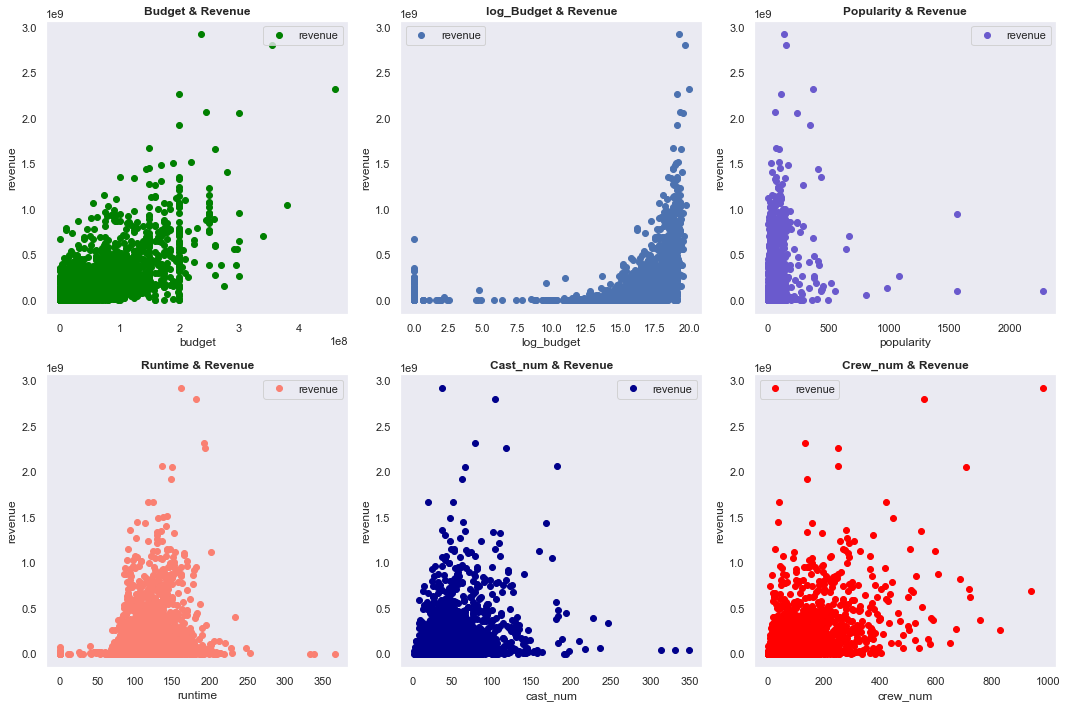

In [19]:
#True Value set
fig, ax = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)

train_true.plot(ax=ax[0][0], x='budget', y='revenue', style='o', ylabel= 'revenue', color='green').set_title('Budget & Revenue', fontweight="bold")
ax[0][0].grid()

train_true.plot(ax=ax[0][1], x='log_budget', y='revenue', style='o', ylabel= 'revenue').set_title('log_Budget & Revenue', fontweight="bold")
ax[0][1].grid()

train_true.plot(ax=ax[0][2], x='popularity', y='revenue', style='o', ylabel= 'revenue', color='slateblue').set_title('Popularity & Revenue', fontweight="bold")
ax[0][2].grid()

train_true.plot(ax=ax[1][0], x='runtime', y='revenue', style='o', ylabel= 'revenue', color='salmon').set_title('Runtime & Revenue', fontweight="bold")
ax[1][0].grid()

train_true.plot(ax=ax[1][1], x='cast_num', y='revenue', style='o', ylabel= 'revenue', color='DarkBlue').set_title('Cast_num & Revenue', fontweight="bold")
ax[1][1].grid()

train_true.plot(ax=ax[1][2], x='crew_num', y='revenue', style='o', ylabel= 'revenue', color='red').set_title('Crew_num & Revenue', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

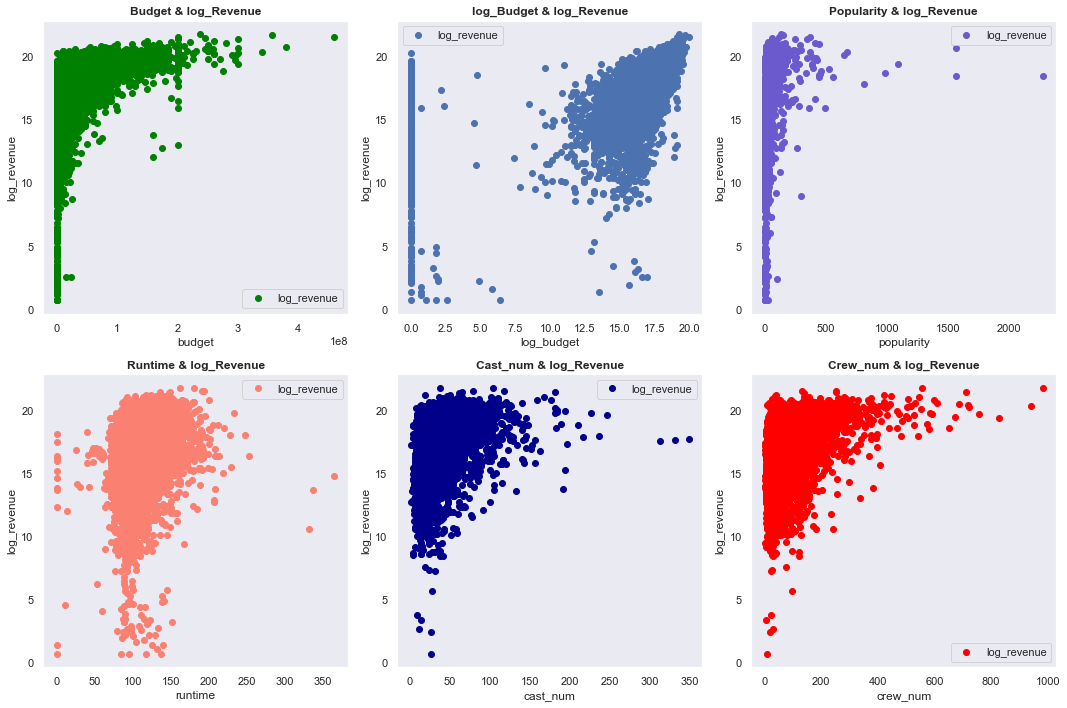

In [20]:
#True Value set
fig, ax = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)

train_true.plot(ax=ax[0][0], x='budget', y='log_revenue', style='o', ylabel= 'log_revenue', color='green').set_title('Budget & log_Revenue', fontweight="bold")
ax[0][0].grid()

train_true.plot(ax=ax[0][1], x='log_budget', y='log_revenue', style='o', ylabel= 'log_revenue').set_title('log_Budget & log_Revenue', fontweight="bold")
ax[0][1].grid()

train_true.plot(ax=ax[0][2], x='popularity', y='log_revenue', style='o', ylabel= 'log_revenue', color='slateblue').set_title('Popularity & log_Revenue', fontweight="bold")
ax[0][2].grid()

train_true.plot(ax=ax[1][0], x='runtime', y='log_revenue', style='o', ylabel= 'log_revenue', color='salmon').set_title('Runtime & log_Revenue', fontweight="bold")
ax[1][0].grid()

train_true.plot(ax=ax[1][1], x='cast_num', y='log_revenue', style='o', ylabel= 'log_revenue', color='DarkBlue').set_title('Cast_num & log_Revenue', fontweight="bold")
ax[1][1].grid()

train_true.plot(ax=ax[1][2], x='crew_num', y='log_revenue', style='o', ylabel= 'log_revenue', color='red').set_title('Crew_num & log_Revenue', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

              revenue  log_revenue    budget  log_budget  popularity  \
revenue      1.000000     0.518584  0.728093    0.304613    0.290242   
log_revenue  0.518584     1.000000  0.510232    0.510493    0.193632   
budget       0.728093     0.510232  1.000000    0.473523    0.282668   
log_budget   0.304613     0.510493  0.473523    1.000000    0.125599   
popularity   0.290242     0.193632  0.282668    0.125599    1.000000   
runtime      0.223805     0.215146  0.244916    0.181901    0.089806   
cast_num     0.305196     0.319372  0.336709    0.285778    0.073340   
crew_num     0.478006     0.357693  0.523629    0.254499    0.158322   

              runtime  cast_num  crew_num  
revenue      0.223805  0.305196  0.478006  
log_revenue  0.215146  0.319372  0.357693  
budget       0.244916  0.336709  0.523629  
log_budget   0.181901  0.285778  0.254499  
popularity   0.089806  0.073340  0.158322  
runtime      1.000000  0.341924  0.171717  
cast_num     0.341924  1.000000  0.270079  

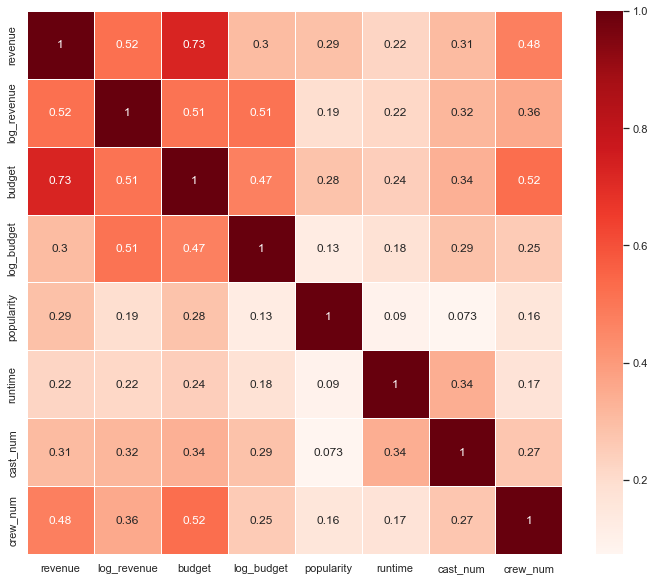

In [21]:
col = ['revenue','log_revenue','budget','log_budget','popularity','runtime','cast_num','crew_num']

plt.subplots(figsize=(12, 10))

corr = train_true[col].corr()

sns.heatmap(corr, annot = True, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")

print(corr)

In [22]:
error = train_true[(train_true['revenue'] == 0) | (train_true['budget'] == 0)]
non_error = train_true[(train_true['budget'] != 0) & (train_true['revenue'] != 0)]
print('Number of data points with zero budget or revenue: ', len(error))

Number of data points with zero budget or revenue:  1641


In [23]:
#move all the data whose log_budegt is less than 10 in non-error to the error dataframe
temp = non_error[non_error['log_budget'] < 10]
error = error.append(temp, ignore_index=True)
non_error = non_error[non_error['log_budget'] >= 10]
#move all the data whose log_revenue is less than 7.5 in non-error to the error dataframe
temp = non_error[non_error['log_revenue'] < 7.5]
error = error.append(temp, ignore_index=True)
non_error = non_error[non_error['log_revenue'] >= 7.5]

In [24]:
train_res = non_error.dropna(thresh=22)
#preserve rows with more than "thresh" values
train_res.describe(include="all")

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,revenue,adult,backdrop_path,video,vote_average,vote_count,cast_num,crew_num,log_revenue,log_budget
count,5.499000e+03,3930,5.499000e+03,5499,2425,5499,5499,5499,5498,5499.000000,...,5.499000e+03,3440,3440,3440,3440.000000,3440.000000,3440.000000,3440.000000,5499.000000,5499.000000
unique,NaN,1035,NaN,1837,2398,5499,36,5371,5497,NaN,...,NaN,1,3440,1,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,[null],NaN,"[{'id':18,'name':'Drama'}]",http://www.thehungergames.movie/,tt2637294,en,Robin Hood,"In 208 A.D., in the final days of the Han Dyna...",NaN,...,NaN,False,/kjQBrc00fB2RjHZB3PGR4w9ibpz.jpg,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2369,NaN,159,4,1,4945,3,2,NaN,...,NaN,3440,1,3440,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.088437e+05,NaN,3.661719e+07,NaN,NaN,NaN,NaN,NaN,NaN,28.392163,...,1.099415e+08,NaN,NaN,NaN,6.657269,2791.950581,42.330814,91.863081,17.246917,16.654769
std,2.064078e+05,NaN,4.561898e+07,NaN,NaN,NaN,NaN,NaN,NaN,60.946575,...,1.968077e+08,NaN,NaN,NaN,0.785561,3733.478751,28.202718,91.591026,1.994738,1.442640
min,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.045860,...,2.970000e+03,NaN,NaN,NaN,2.892000,1.000000,2.000000,2.000000,7.996654,10.126671
25%,1.486500e+03,NaN,7.960000e+06,NaN,NaN,NaN,NaN,NaN,NaN,10.771294,...,1.158419e+07,NaN,NaN,NaN,6.135750,614.750000,24.000000,32.000000,16.265381,15.894952
50%,6.477000e+03,NaN,2.000000e+07,NaN,NaN,NaN,NaN,NaN,NaN,18.606000,...,4.148085e+07,NaN,NaN,NaN,6.695500,1426.500000,36.000000,63.500000,17.540775,16.811243
75%,6.804500e+04,NaN,4.500000e+07,NaN,NaN,NaN,NaN,NaN,NaN,29.346500,...,1.199416e+08,NaN,NaN,NaN,7.219250,3356.000000,53.000000,122.000000,18.602516,17.622173


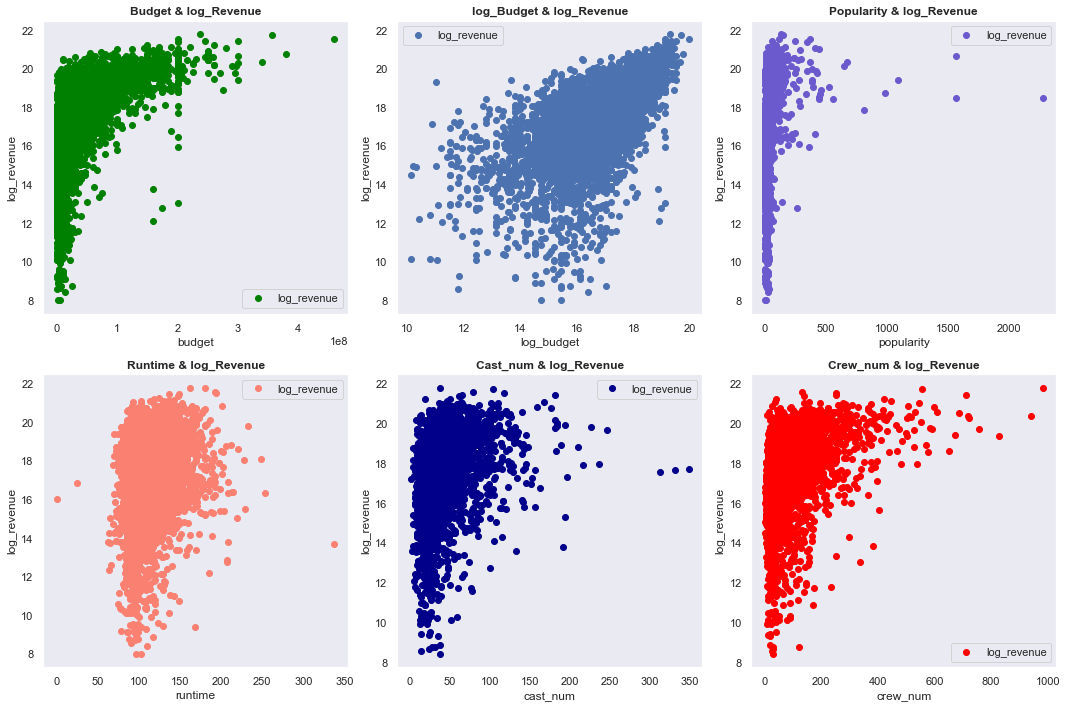

In [25]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)

train_res.plot(ax=ax[0][0], x='budget', y='log_revenue', style='o', ylabel= 'log_revenue', color='green').set_title('Budget & log_Revenue', fontweight="bold")
ax[0][0].grid()

train_res.plot(ax=ax[0][1], x='log_budget', y='log_revenue', style='o', ylabel= 'log_revenue').set_title('log_Budget & log_Revenue', fontweight="bold")
ax[0][1].grid()

train_res.plot(ax=ax[0][2], x='popularity', y='log_revenue', style='o', ylabel= 'log_revenue', color='slateblue').set_title('Popularity & log_Revenue', fontweight="bold")
ax[0][2].grid()

train_res.plot(ax=ax[1][0], x='runtime', y='log_revenue', style='o', ylabel= 'log_revenue', color='salmon').set_title('Runtime & log_Revenue', fontweight="bold")
ax[1][0].grid()

train_res.plot(ax=ax[1][1], x='cast_num', y='log_revenue', style='o', ylabel= 'log_revenue', color='DarkBlue').set_title('Cast_num & log_Revenue', fontweight="bold")
ax[1][1].grid()

train_res.plot(ax=ax[1][2], x='crew_num', y='log_revenue', style='o', ylabel= 'log_revenue', color='red').set_title('Crew_num & log_Revenue', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

              revenue  log_revenue    budget  log_budget  popularity  \
revenue      1.000000     0.604721  0.714172    0.488697    0.279340   
log_revenue  0.604721     1.000000  0.549854    0.629565    0.200995   
budget       0.714172     0.549854  1.000000    0.744172    0.270731   
log_budget   0.488697     0.629565  0.744172    1.000000    0.189565   
popularity   0.279340     0.200995  0.270731    0.189565    1.000000   
runtime      0.220304     0.193321  0.235484    0.225208    0.092940   
cast_num     0.279358     0.281655  0.289301    0.283245    0.063464   
crew_num     0.475897     0.375338  0.518817    0.446187    0.153751   

              runtime  cast_num  crew_num  
revenue      0.220304  0.279358  0.475897  
log_revenue  0.193321  0.281655  0.375338  
budget       0.235484  0.289301  0.518817  
log_budget   0.225208  0.283245  0.446187  
popularity   0.092940  0.063464  0.153751  
runtime      1.000000  0.331920  0.169019  
cast_num     0.331920  1.000000  0.240268  

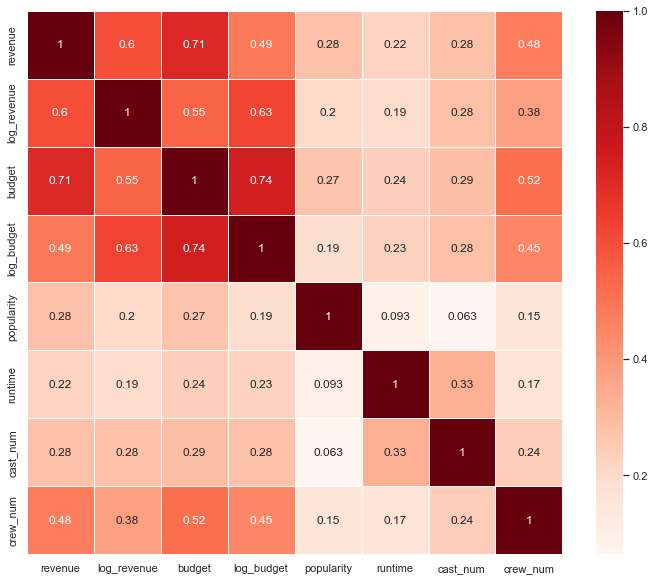

In [26]:
col = ['revenue','log_revenue','budget','log_budget','popularity','runtime','cast_num','crew_num']

plt.subplots(figsize=(12, 10))

corr2 = train_res[col].corr()

sns.heatmap(corr2, annot = True, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")

print(corr2)

In [27]:
train_err = error
train_err.describe(include="all")

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,revenue,adult,backdrop_path,video,vote_average,vote_count,cast_num,crew_num,log_revenue,log_budget
count,1.704000e+03,963,1.704000e+03,1702,544,1704,1704,1704,1702,1704.000000,...,1.704000e+03,854,854,854,854.000000,854.000000,854.000000,854.000000,1704.000000,1704.000000
unique,NaN,247,NaN,758,539,1704,31,1699,1702,NaN,...,NaN,1,854,1,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,[null],NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.naruto-movie.com/,tt1380152,en,Flashback,Marine Boy is the story of a former national s...,NaN,...,NaN,False,[null],False,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,638,NaN,98,5,1,1159,2,1,NaN,...,NaN,854,1,854,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.786433e+05,NaN,2.766807e+05,NaN,NaN,NaN,NaN,NaN,NaN,15.893991,...,1.463505e+07,NaN,NaN,NaN,6.660775,577.963700,25.991803,52.978923,14.300599,0.204431
std,2.846889e+05,NaN,3.320054e+06,NaN,NaN,NaN,NaN,NaN,NaN,21.613129,...,3.483307e+07,NaN,NaN,NaN,0.846195,758.279998,15.695630,50.903831,3.183031,1.497276
min,5.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,1.000000e+00,NaN,NaN,NaN,0.000000,0.000000,2.000000,1.000000,0.693147,0.000000
25%,1.415500e+03,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.575389,...,3.704948e+05,NaN,NaN,NaN,6.142000,189.000000,15.000000,17.250000,12.809335,0.000000
50%,2.928000e+03,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,12.422000,...,3.268818e+06,NaN,NaN,NaN,6.700000,366.000000,22.000000,34.000000,14.988381,0.000000
75%,3.647855e+05,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,20.438500,...,1.501849e+07,NaN,NaN,NaN,7.249750,708.500000,32.000000,72.000000,16.524790,0.000000


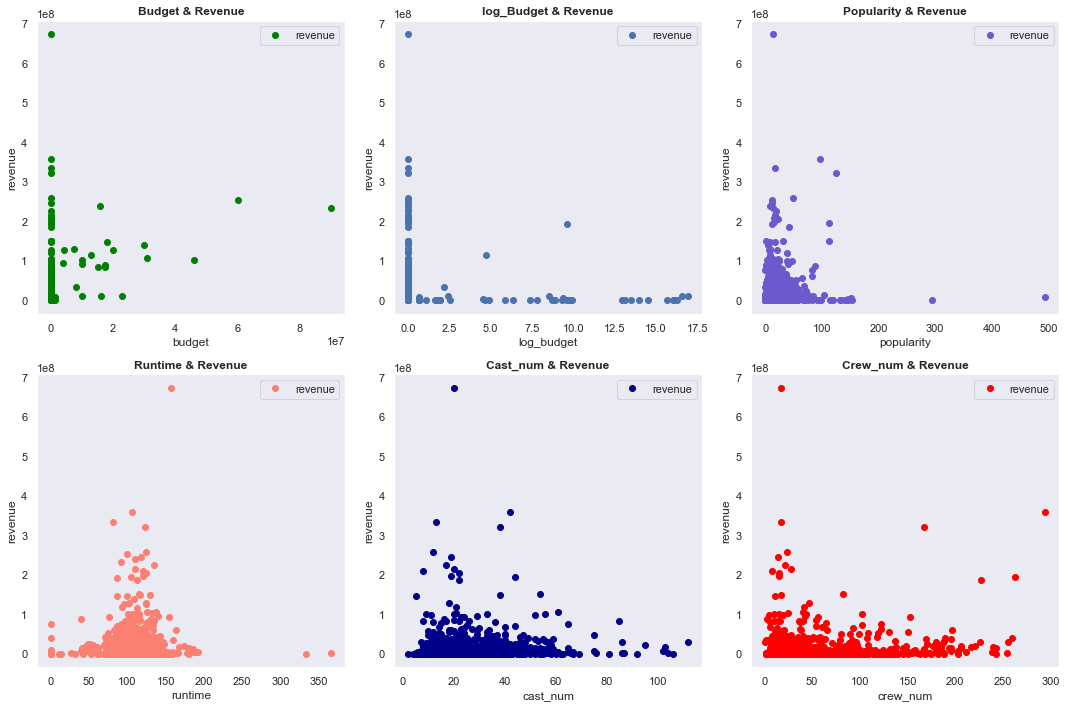

In [28]:
#Error set
fig, ax = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)

train_err.plot(ax=ax[0][0], x='budget', y='revenue', style='o', ylabel= 'revenue', color='green').set_title('Budget & Revenue', fontweight="bold")
ax[0][0].grid()

train_err.plot(ax=ax[0][1], x='log_budget', y='revenue', style='o', ylabel= 'revenue').set_title('log_Budget & Revenue', fontweight="bold")
ax[0][1].grid()

train_err.plot(ax=ax[0][2], x='popularity', y='revenue', style='o', ylabel= 'revenue', color='slateblue').set_title('Popularity & Revenue', fontweight="bold")
ax[0][2].grid()

train_err.plot(ax=ax[1][0], x='runtime', y='revenue', style='o', ylabel= 'revenue', color='salmon').set_title('Runtime & Revenue', fontweight="bold")
ax[1][0].grid()

train_err.plot(ax=ax[1][1], x='cast_num', y='revenue', style='o', ylabel= 'revenue', color='DarkBlue').set_title('Cast_num & Revenue', fontweight="bold")
ax[1][1].grid()

train_err.plot(ax=ax[1][2], x='crew_num', y='revenue', style='o', ylabel= 'revenue', color='red').set_title('Crew_num & Revenue', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

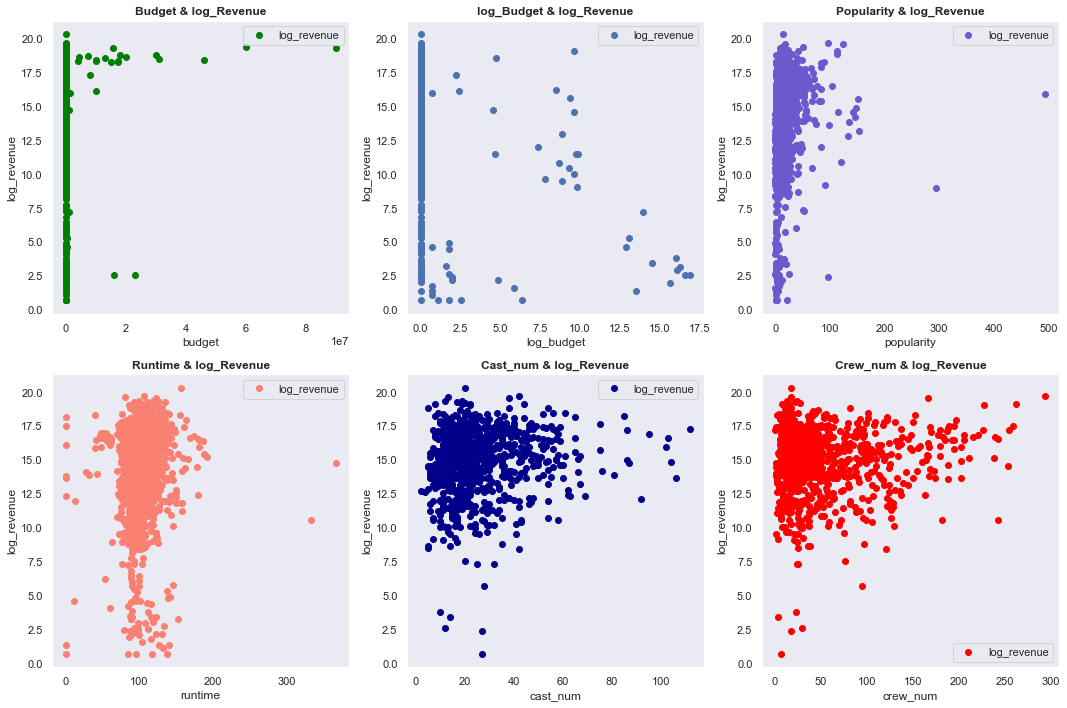

In [29]:
#Error set
fig, ax = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)

train_err.plot(ax=ax[0][0], x='budget', y='log_revenue', style='o', ylabel= 'log_revenue', color='green').set_title('Budget & log_Revenue', fontweight="bold")
ax[0][0].grid()

train_err.plot(ax=ax[0][1], x='log_budget', y='log_revenue', style='o', ylabel= 'log_revenue').set_title('log_Budget & log_Revenue', fontweight="bold")
ax[0][1].grid()

train_err.plot(ax=ax[0][2], x='popularity', y='log_revenue', style='o', ylabel= 'log_revenue', color='slateblue').set_title('Popularity & log_Revenue', fontweight="bold")
ax[0][2].grid()

train_err.plot(ax=ax[1][0], x='runtime', y='log_revenue', style='o', ylabel= 'log_revenue', color='salmon').set_title('Runtime & log_Revenue', fontweight="bold")
ax[1][0].grid()

train_err.plot(ax=ax[1][1], x='cast_num', y='log_revenue', style='o', ylabel= 'log_revenue', color='DarkBlue').set_title('Cast_num & log_Revenue', fontweight="bold")
ax[1][1].grid()

train_err.plot(ax=ax[1][2], x='crew_num', y='log_revenue', style='o', ylabel= 'log_revenue', color='red').set_title('Crew_num & log_Revenue', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

              revenue  log_revenue    budget  log_budget  popularity  \
revenue      1.000000     0.447170  0.309641   -0.022450    0.115732   
log_revenue  0.447170     1.000000  0.079178   -0.303576    0.138330   
budget       0.309641     0.079178  1.000000    0.082471   -0.025042   
log_budget  -0.022450    -0.303576  0.082471    1.000000   -0.039671   
popularity   0.115732     0.138330 -0.025042   -0.039671    1.000000   
runtime      0.116343     0.112470  0.015197   -0.063674   -0.040368   
cast_num     0.023124     0.112634 -0.067073   -0.074773   -0.068280   
crew_num     0.055181     0.073284 -0.045668   -0.060897    0.037546   

              runtime  cast_num  crew_num  
revenue      0.116343  0.023124  0.055181  
log_revenue  0.112470  0.112634  0.073284  
budget       0.015197 -0.067073 -0.045668  
log_budget  -0.063674 -0.074773 -0.060897  
popularity  -0.040368 -0.068280  0.037546  
runtime      1.000000  0.311136  0.057900  
cast_num     0.311136  1.000000  0.201137  

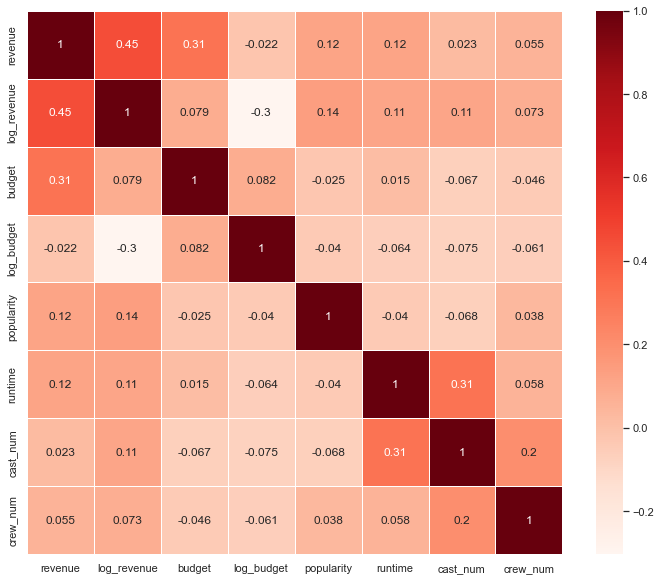

In [30]:
col = ['revenue','log_revenue','budget','log_budget','popularity','runtime','cast_num','crew_num']

plt.subplots(figsize=(12, 10))

corr3 = train_err[col].corr()

sns.heatmap(corr3, annot = True, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")

print(corr3)